In [1]:
import numpy as np

import SchemDraw as schem
import SchemDraw.elements as e
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
d = schem.Drawing()

tinputs = {'cnt':4}
rinputs = {'cnt':1}
linputs = {'cnt':1}
binputs = {'cnt':4}
tline = e.blackbox(d.unit*5, d.unit/6., linputs=linputs, binputs=binputs, tinputs=tinputs, rinputs=rinputs, leadlen=0)
tlineinst = d.add(tline)
d.add(e.CAP, d='left', xy=tlineinst.inL1, l=d.unit/2., label='$C_g$')
d.add(e.SOURCE_SIN, d='down', l=d.unit*0.67)
d.add(e.GND)

def draw_qubit_schem(rot, b, ud=False):
    dirs = np.roll(['up', 'left', 'down', 'right'], rot)
    if ud:
        dirs = [dirs[2], dirs[1], dirs[0], dirs[3]]
    d.add(e.CAP, d=dirs[0], xy=b, l=d.unit/2., label='$C_c$')
    d.push()
    d.add(e.LINE, d=dirs[1], l=d.unit/4.)
    d.add(e.JJ, d=dirs[0], l=2*d.unit/3.)
    d.add(e.LINE, d=dirs[3], l=d.unit/4.)
    d.pop()
    d.push()
    d.add(e.LINE, d=dirs[3], l=d.unit/4.)
    d.add(e.CAP, d=dirs[0], l=2*d.unit/3., botlabel='$C_s$')
    d.add(e.LINE, d=dirs[1], l=d.unit/4.)
    d.pop()
    d.add(e.JJ, d=dirs[0], l=d.unit/3.)
    d.add(e.JJ, d=dirs[0], l=d.unit/3.)
    return d.add(e.LINE, d=dirs[0], l=d.unit/3.)

top_first = draw_qubit_schem(rot=0, b=tlineinst.inT1)
draw_qubit_schem(rot=0, b=tlineinst.inT2)
top_last = draw_qubit_schem(rot=0, b=tlineinst.inT4)

bottom_first = draw_qubit_schem(rot=0, b=tlineinst.inB1, ud=True)
draw_qubit_schem(rot=0, b=tlineinst.inB2, ud=True)
bottom_last = draw_qubit_schem(rot=0, b=tlineinst.inB4, ud=True)

d.add(e.LINE, xy=top_first.end, d='left', l=d.unit/2.)
d.add(e.GND)
d.add(e.LINE, endpts=[top_first.end, top_last.end], d='right')
d.add(e.LINE, endpts=[bottom_first.end, bottom_last.end], d='right')
d.add(e.LINE, xy=bottom_first.end, d='left', l=d.unit/2.)
d.add(e.GND)

d.add(e.LINE, xy=tlineinst.inR1, l=d.unit/4., d='right')
d.push()
d.add(e.LINE, l=d.unit/3.75, d='up')
d.add(e.JJ, l=d.unit/3., d='right', label='$JJ_{SQ}$')
#d.add(e.LINE, l=d.unit/6., d='down')
d.pop()
d.add(e.LINE, l=d.unit/3.75, d='down')
d.add(e.JJ, l=d.unit/3., d='right', label='$JJ_{SQ}$')
d.add(e.GND)
#d.add(e.LINE, l=d.unit/6., d='up')
xf = d.add(e.transformer(t1=4, t2=4, rtaps={'B':3}, loop=False,core=False))
xf1 = d.add(e.LINE, xy=xf.s1, d='right', l=d.unit/3.)
d.add(e.DOT_OPEN)
xf2 = d.add(e.LINE, xy=xf.s2, d='right', l=d.unit/3.)
d.add(e.DOT_OPEN)
#d.add(e.GAP_LABEL, endpts=[xf1.end, xf2.end])
#d.add(e.INDUCTOR, l=d.unit/2., d='up')

#d.add(e.LINE, l=d.unit/4., d='right')
#d.add(e.GND)

d.draw()
d.save('C:\\Documents\\МИСиС\\ICQT-2017\\quantum\\schem.pdf')

AttributeError: 'Element' object has no attribute 'inL1'

In [2]:
import numpy as np
from scipy.sparse.linalg import *
from scipy.constants import *
from matplotlib import pyplot as plt
from QCircuit import *
import sympy
%matplotlib inline

In [3]:
print ('geometric inductance', 4.16e-7*2.47e-3)
print ('geometric capacitance', 1.66e-10*2.47e-3)
print ('josephson inductance', value('Planck constant')/(2*value('elementary charge'))/(2*pi*864e-9))
print ('classsical res freq', 1/(2*pi*np.sqrt(value('Planck constant')/(2*value('elementary charge'))/(2*pi*864e-9)*1.66e-10*2.47e-3)))

geometric inductance 1.02752e-09
geometric capacitance 4.1002e-13
josephson inductance 3.809096941242712e-10
classsical res freq 12735224294.2


0.047244461773296366 429.13455684659795 214.662492472665 9083.277504690603


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


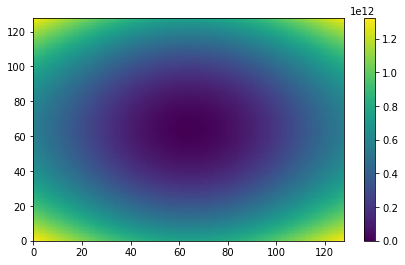

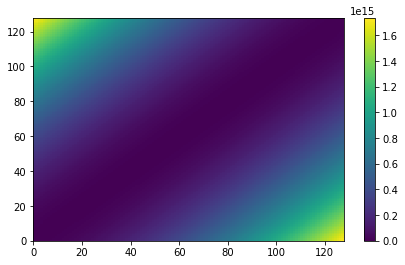

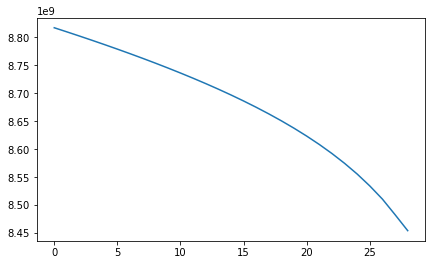

In [8]:
# resonator quantum calculation
#Ll=4.16e-7
#Cl=1.66e-10

Lg = 1.028e-09/2.7
Ic = 864e-9
c_g = 41e-14

c_s = 2e-15

res = QCircuit()
res.add_element(QInductance('Lg'), ['GND', '1'])
res.add_element(QJosephsonJunction('Ic'), ['1', '2'])
res.add_element(QCapacitance('C'), ['GND', '2'])
res.add_element(QCapacitance('Cs'), ['1', '2'])

Ec = (value('elementary charge'))**2/(2*c_g)/(value('Planck constant'))
Ej = Ic/(2*value('elementary charge')*2*np.pi)
El = ((value('Planck constant')/(2*np.pi))/(2*value('elementary charge')))**2/(2*Lg)/value('Planck constant')
Ec_s = (value('elementary charge'))**2/(2*c_s)/(value('Planck constant'))

phi1 = QVariable('φ1')
phi2 = QVariable('φ2')
phix = QVariable('φx')
phi1.create_grid(128, 0.6)
phi2.create_grid(128, 0.6)
phix.set_parameter(0, 0)
res.add_variable(phi1)
res.add_variable(phi2)
res.add_variable(phix)
res.map_nodes_linear(['GND', '1', '2'], 
                     ['φ1', 'φ2', 'φx'], 
                     np.asarray([[0,0,0],[1,0,0],[1,1,0]]))

res.find_element('Ic').set_critical_current(Ej)
res.find_element('Lg').set_inductance(1/(2*El))
res.find_element('C').set_capacitance(1/(8*Ec))
res.find_element('Cs').set_capacitance(1/(8*Ec_s))
res.calculate_potentials()

[eigenenergies, eigenfunctions] = res.diagonalize_phase(num_states=30, maxiter=2000)

#print(eigenenergies-eigenenergies[0])

plt.figure()
plt.pcolormesh(np.reshape(res.phase_potential, (128,128)));
plt.colorbar()
plt.figure()
plt.pcolormesh(np.reshape(res.charge_potential, (128,128)));
plt.colorbar()

plt.figure()
plt.plot(np.diff(eigenenergies))
res_voltage_amplitude = np.sum(np.fft.fftshift(np.fft.fft(np.fft.fftshift(eigenfunctions[..., 0]), norm='ortho'))*\
                               res.create_charge_grid()[0]*\
                               np.fft.fftshift(np.fft.fft(np.fft.fftshift(np.conj(eigenfunctions[..., 1])), norm='ortho')))/\
                               res.capacitance_matrix()[0,0]

print (Ec/1e9, Ej/1e9, El/1e9, Ej/Ec)

In [9]:
res_voltage_amplitude = np.sum(np.fft.fftshift(np.fft.fft(np.fft.fftshift(eigenfunctions[..., 0]), norm='ortho'))*\
                               res.create_charge_grid()[0]*\
                               np.fft.fftshift(np.fft.fft(np.fft.fftshift(np.conj(eigenfunctions[..., 1])), norm='ortho')))/\
                               res.capacitance_matrix()[0,0]

In [10]:
np.abs(res_voltage_amplitude)

1499229245.8303406

1499229245.83 88549619780.8069 0.0169309506866


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


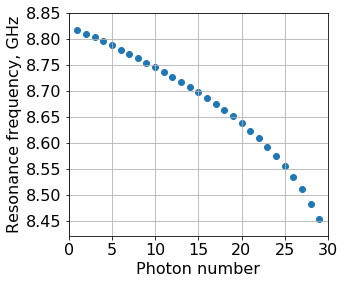

In [11]:
plt.figure(figsize=(4,4))
plt.scatter(np.arange(1, 30), np.diff(eigenenergies)[:29]/1e9)
plt.xlim([0, 30])
plt.grid()
for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_fontsize(16) 
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(16) 
plt.xlabel('Photon number', fontsize=16)
plt.ylabel('Resonance frequency, GHz', fontsize=16)
c_c = 1.75e-15/(2*value('elementary charge'))**2*value('Planck constant')
print(np.abs(res_voltage_amplitude), 1/c_c, np.abs(res_voltage_amplitude)*c_c)
ng_res = np.abs(res_voltage_amplitude)*c_c

In [4]:
#critical_current_density = 2.25e6*2*np.pi
junction_area = 0.168e-6*0.231e-7
dielectric_permittivity = 11
#substrate_effective_permittivity = (1+11.45)/2
#Ej = critical_current_density*junction_area/(2*value('elementary charge')*2*np.pi)
c = value('electric constant')*dielectric_permittivity/2e-9*junction_area
#c_wire = 8.4e-15
#Ec = (2*value('elementary charge'))**2/(2*c)/value('Planck constant')
#Ec_wire = (2*value('elementary charge'))**2/(2*c_wire)/value('Planck constant')

c_s = 28.8e-15
Ec = (value('elementary charge'))**2/(2*c)/(value('Planck constant'))
Ic = 253e-9
Ej = Ic/(2*value('elementary charge')*2*np.pi)
Ec_s = (value('elementary charge'))**2/(2*c_s)/(value('Planck constant'))

print ('Josephson critial current: {0:10.4g} A'.format(Ic))
print ('Josephson energy: {0:10.4g} Hz'.format(Ej))
print ('Junction capacitance: {0:10.4g} F'.format(c))
print ('Charging energy: {0:10.4g} Hz'.format(1/(1/Ec)))
print ('Ej/Ec ratio: {0:4.1f}'.format(Ej*(1/Ec_s)))

Josephson critial current:   2.53e-07 A
Josephson energy:  1.257e+11 Hz
Junction capacitance:   1.89e-16 F
Charging energy:  1.025e+11 Hz
Ej/Ec ratio: 186.8


In [8]:
FQ3JJ = QCircuit()
FQ3JJ.add_element(QJosephsonJunction('JJ1'), ['GND', '1'])
FQ3JJ.add_element(QJosephsonJunction('JJ2'), ['island', '2'])
FQ3JJ.add_element(QJosephsonJunction('JJ3'), ['2', '3'])
FQ3JJ.add_element(QCapacitance('C1'), ['GND', '1'])
FQ3JJ.add_element(QCapacitance('C2'), ['island', '2'])
FQ3JJ.add_element(QCapacitance('C3'), ['2', '3'])
        
phi1 = QVariable('φ1')
phi2 = QVariable('φ2')
phii = QVariable('φi')
phix = QVariable('φx')
N=37
phi1.create_grid(N, 1)
phi2.create_grid(N, 1)
FQ3JJ.add_variable(phi1)
FQ3JJ.add_variable(phi2)
FQ3JJ.add_variable(phii)
FQ3JJ.add_variable(phix)
FQ3JJ.map_nodes_linear(['GND', '1', 'island', '2', '3'], 
                       ['φ1', 'φ2', 'φi', 'φx'], 
                       np.asarray([[0,0,0,0],[1,0,0,0],[1,0,1,0],[1,1,1,0],[0,0,0,1]]))

flux_steps = 3
charge_steps = 129
energies = np.zeros((charge_steps, flux_steps, 5), dtype=np.complex)
charges = np.zeros((charge_steps, flux_steps, 5, 5), dtype=np.complex)

#Ej = 36.2e9
c_s = 28.8e-15
c = 2e-15
Ec_s = (value('elementary charge'))**2/(2*c_s)/(value('Planck constant'))
Ic = 257e-9
Ej = Ic/(2*value('elementary charge')*2*np.pi)
Ec = (value('elementary charge'))**2/(2*c)/(value('Planck constant'))
alpha = 0.51

FQ3JJ.find_element('JJ1').set_critical_current(Ej)
FQ3JJ.find_element('JJ2').set_critical_current(Ej)
FQ3JJ.find_element('C1').set_capacitance(1/(8*Ec))
FQ3JJ.find_element('C2').set_capacitance(1/(8*Ec))
FQ3JJ.find_element('JJ3').set_critical_current(Ej*alpha)
FQ3JJ.find_element('C3').set_capacitance(1/(8*Ec_s)+alpha/(8*Ec))
#qubit_fluxes = np.linspace(0, 2*np.pi, flux_steps)
qubit_fluxes = np.linspace(0, 2*np.pi, flux_steps)
island_voltages = np.linspace(0, (4*Ec), charge_steps)
for island_charge_id, island_voltage in enumerate(island_voltages):
    for qubit_flux_id, qubit_flux in enumerate(qubit_fluxes):
        print('flux id: {0: 2d}/{1: 2d}'.format(qubit_flux_id, flux_steps), end='\r')
        phix.set_parameter(qubit_flux, 0)
        phii.set_parameter(0, island_voltage)
        FQ3JJ.calculate_potentials()
        [eigenenergies, eigenfunctions] = FQ3JJ.diagonalize_phase(num_states=5)
    
        energies[island_charge_id, qubit_flux_id, :] = eigenenergies
        charges[island_charge_id, qubit_flux_id,:,:] = np.sum(np.fft.fftshift(np.fft.fft(np.fft.fftshift(eigenfunctions[..., 0]), norm='ortho'))*\
                                 (FQ3JJ.create_charge_grid()[1]+FQ3JJ.create_charge_grid()[0])*\
                                  np.fft.fftshift(np.fft.fft(np.fft.fftshift(np.conj(eigenfunctions[..., 1])), norm='ortho')))

In [ ]:
plt.pcolormesh(np.real(np.asarray(energies[:,:,1]-energies[:,:,0])))

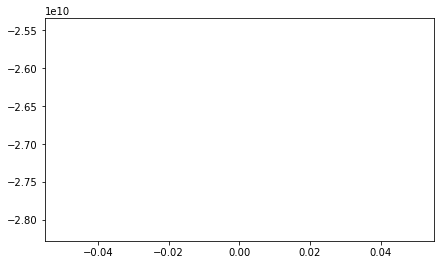

In [7]:
plt.plot(np.real(np.asarray(energies[:,65,0]-np.asarray(energies[:,65,4]))))

In [ ]:
FQ3JJ.capacitance_matrix_legendre_transform()

In [ ]:
%matplotlib inline
plt.plot(qubit_fluxes, np.asarray(energies)[0,:,:5])
#plt.xlim([np.pi*0.98, np.pi*1.0])
plt.ylim([0, 3.0e11])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


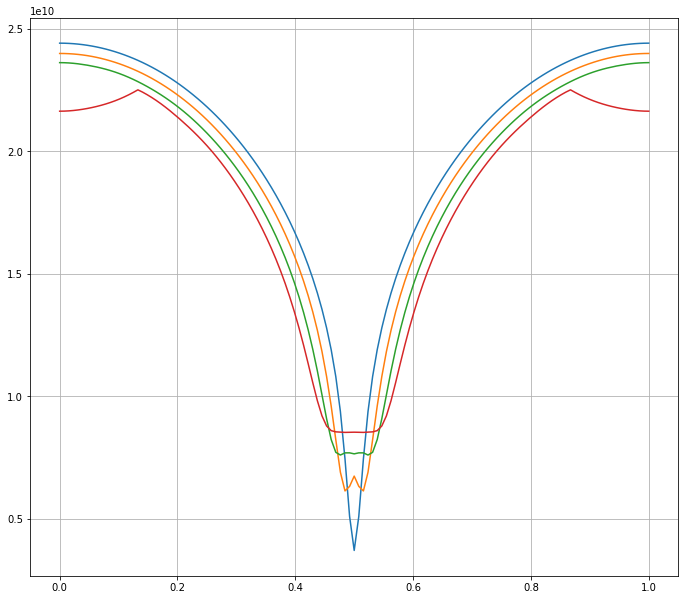

In [29]:
%matplotlib inline
plt.figure(figsize=(10,10))
plt.plot(qubit_fluxes/(2*np.pi), np.diff(np.asarray(energies[0,:,:5])))
#plt.xlim([np.pi*0.98, np.pi*1.0])
#plt.ylim([3.5e9, 8e9])
plt.grid()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


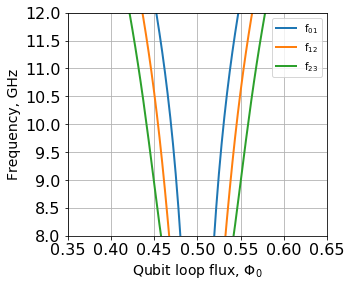

In [77]:
%matplotlib inline
plt.figure(figsize=(4,4))
pdata = np.diff(np.asarray(energies))/1e9
plt.plot(qubit_fluxes/(2*np.pi), pdata[:,0], linewidth=2, label='$f_{01}$')
plt.plot(qubit_fluxes/(2*np.pi), pdata[:,1], linewidth=2, label='$f_{12}$')
plt.plot(qubit_fluxes/(2*np.pi), pdata[:,2], linewidth=2, label='$f_{23}$')
for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_fontsize(16) 
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(16) 
#plt.title('alpha={0:5.3g} , Ic={1:5.3g} A'.format(alpha, Ic))
#plt.xlim([np.pi*0.98, np.pi*1.0])
plt.ylim([0.8e1, 1.2e1])
plt.xlim([0.35, 0.65])
plt.ylabel('Frequency, GHz', fontsize=14)
plt.xlabel('Qubit loop flux, $\\Phi_0$', fontsize=14)
plt.legend()
plt.grid()

In [ ]:
np.g()

In [10]:
%matplotlib inline
plt.figure(figsize=(4,4))
#pdata = np.diff(np.asarray(energies))/1e9
plt.plot(qubit_fluxes/(2*np.pi), np.abs(charges[:,0,1])*np.abs(ng_res)/FQ3JJ.capacitance_matrix()[2,2]/1e6, linewidth=2)
for tick in plt.gca().xaxis.get_major_ticks():
    tick.label.set_fontsize(16) 
for tick in plt.gca().yaxis.get_major_ticks():
    tick.label.set_fontsize(16) 
#plt.title('alpha={0:5.3g} , Ic={1:5.3g} A'.format(alpha, Ic))
#plt.xlim([np.pi*0.98, np.pi*1.0])
#plt.ylim([0.8e1, 1.2e1])
plt.xlim([0.35, 0.65])
plt.ylabel('g, MHz', fontsize=14)
plt.xlabel('Qubit loop flux, $\\Phi_0$', fontsize=14)
#plt.legend()
plt.grid()

NameError: name 'ng_res' is not defined

In [199]:
FQ3JJ.capacitance_matrix()

array([[  1.29064037e-11,  -1.29064037e-11,   0.00000000e+00,
          0.00000000e+00],
       [ -1.29064037e-11,   2.58128075e-11,  -1.29064037e-11,
          0.00000000e+00],
       [  0.00000000e+00,  -1.29064037e-11,   2.11161671e-10,
         -1.98255268e-10],
       [  0.00000000e+00,   0.00000000e+00,  -1.98255268e-10,
          1.98255268e-10]])

In [191]:
charges[:,0,1]

array([ -1.70014165e+08 -1.71925390e+08j,
         2.32823281e+08 +6.52445995e+07j,
        -1.66348154e+07 +2.41221823e+08j,
         1.01993695e+08 +2.19234769e+08j,
        -6.47097056e+07 +2.32984829e+08j,
         2.02686746e+08 -1.31874198e+08j,
         1.30340950e+08 +2.03686449e+08j,
        -7.23373025e+07 -2.30757938e+08j,
        -6.81349490e+07 -2.32045871e+08j,
         1.02593183e+08 -2.19017833e+08j,
        -2.26265221e+08 -8.54722516e+07j,
        -7.59554786e+06 +2.41768107e+08j,
         2.11683883e+08 -1.17082314e+08j,
         8.48006814e+07 +2.26576203e+08j,
         2.37786770e+08 -4.46738503e+07j,
         2.37712568e+08 +4.51904904e+07j,
        -2.19728704e+08 +1.01393598e+08j,
         2.24496814e+08 -9.04170492e+07j,
         2.41994765e+08 +5.10601775e+06j,
        -2.34240528e+08 -6.10996613e+07j,
        -2.39342506e+08 -3.64965235e+07j,
        -9.67702924e+07 +2.21964330e+08j,
         1.98119072e+08 -1.39277039e+08j,
        -1.65646316e+08 +1.7671432

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


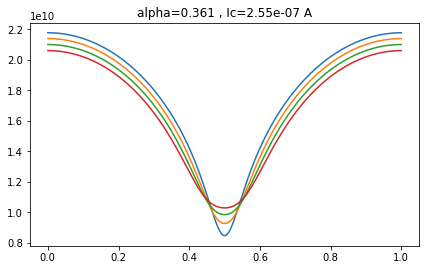

In [16]:
%matplotlib inline
plt.plot(qubit_fluxes/(2*np.pi), np.diff(np.asarray(energies)))
plt.title('alpha={0:5.3g} , Ic={1:5.3g} A'.format(alpha, Ic))
#plt.xlim([np.pi*0.98, np.pi*1.0])
#plt.ylim([0, 3.0e11])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


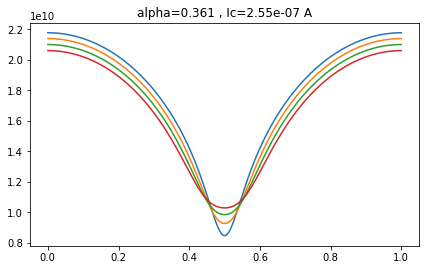

In [17]:
%matplotlib inline
plt.plot(qubit_fluxes/(2*np.pi), np.diff(np.asarray(energies)))
plt.title('alpha={0:5.3g} , Ic={1:5.3g} A'.format(alpha, Ic))
#plt.xlim([np.pi*0.98, np.pi*1.0])
#plt.ylim([0, 3.0e11])

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\numeric.py:583: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


(0, 12000000000.0)

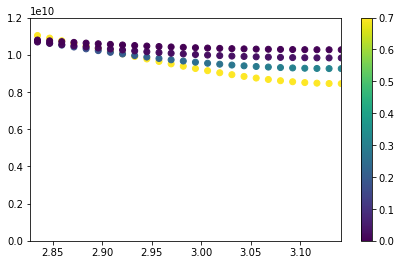

In [18]:
%matplotlib inline
T = 0.2
for i in range(5):
    for j in range(i+1,5):
        transition_energy = energies[:,j]-energies[:,i]
        Z = np.sum(np.exp(-energies*value('Planck constant')/(value('Boltzmann constant')*T)), axis=1)
        transition_intensity = np.abs(charges[:,i,j])*np.exp(-energies[:,i]*value('Planck constant')/(value('Boltzmann constant')*T))/Z
        plt.scatter(qubit_fluxes, transition_energy, c=transition_intensity, vmin=0, vmax=0.7)
plt.colorbar()
plt.xlim([0.90*np.pi, 1.0*np.pi])
plt.ylim([0, 12e9])

In [19]:
energies[:,i]*value('Planck constant')/(value('Boltzmann constant')*T)/Z

array([  4.46395747e+07 +3.57408690e-07j,
         4.46591773e+07 +8.40560579e-07j,
         4.47180362e+07 +2.56298616e-07j,
         4.48163044e+07 -7.39416873e-07j,
         4.49542381e+07 -7.03184994e-07j,
         4.51321972e+07 -3.41336375e-07j,
         4.53506474e+07 +2.62700579e-07j,
         4.56101616e+07 +4.21799213e-08j,
         4.59114228e+07 +6.75110670e-08j,
         4.62552270e+07 -1.74449571e-07j,
         4.66424865e+07 -7.93949760e-08j,
         4.70742338e+07 +2.81777013e-07j,
         4.75516267e+07 -1.24928376e-06j,
         4.80759527e+07 +2.39844868e-08j,
         4.86486349e+07 -8.83935913e-07j,
         4.92712386e+07 -1.21348045e-06j,
         4.99454782e+07 -4.27608491e-07j,
         5.06732247e+07 +8.40967145e-07j,
         5.14565144e+07 -4.60618653e-08j,
         5.22975583e+07 +3.27036981e-07j,
         5.31987523e+07 -5.65636204e-07j,
         5.41626880e+07 -1.17676291e-06j,
         5.51921655e+07 +8.41206784e-07j,
         5.62902061e+07 -2.2408563